<a href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision-video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Dog Breed Classification

CAGATAY CIFTCI 2100206
Artificial Intelligence

## Features of our dataset

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs.
* There are around 10,000+ images in the training set .
* There are around 10,000+ images in the test set with no label. 


In [1]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

In [4]:
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
# Import libraries
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

## Getting dataset ready
Our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# EDA
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     e79011daac807552f798aa1effb60ee4  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


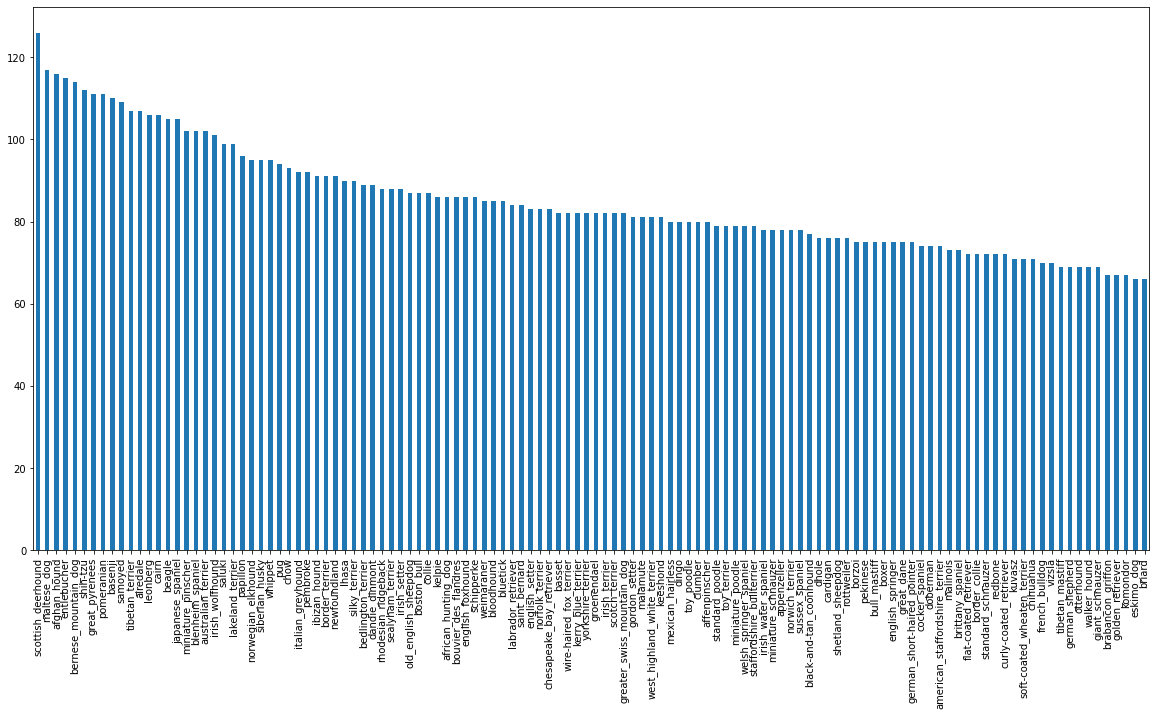

In [6]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

In [8]:
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels 

Get a list of all of our image file pathnames.

In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:5]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
Image(filenames[9000])

In [13]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy() 
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [17]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
len(labels)

10222

In [21]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
print(labels[0]) 
print(np.where(unique_breeds == labels[0])) 
print(boolean_labels[0].argmax()) 
print(boolean_labels[0].astype(int)) 

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating validation and train set.

We are going to validation and train set. Because we have not.

In [27]:
X = filenames
y = boolean_labels

In [28]:
len(filenames)

10222

In [29]:
NUM_IMAGES = 1000 

In [30]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=1881)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [31]:
X_train[:2], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images
* Take an image filepath as input
* Use TensorFlow to read the file and save it to a variable
* Turn our `image` into Tensors
* Normalize our image.
* Resize the `image` to be a shape of (224, 224)
* Return the modified `image`



In [36]:
# Define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Turning our data into batches

we need to turning the train and validation data into batches in order to use the memory effectively.

In [37]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [39]:
BATCH_SIZE = 32
def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  If the data is a test dataset, we probably don't have have labels
  If the data is a valid dataset, we don't need to shuffle it
  """
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) 
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y))) 
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling filenames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [40]:
# Create training and validation data batches
train_data = create_batches(X_train, y_train)
val_data = create_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [41]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [42]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [43]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

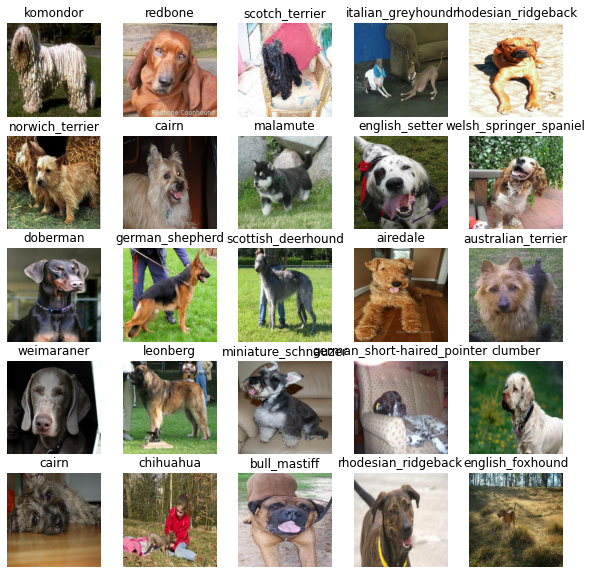

In [48]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

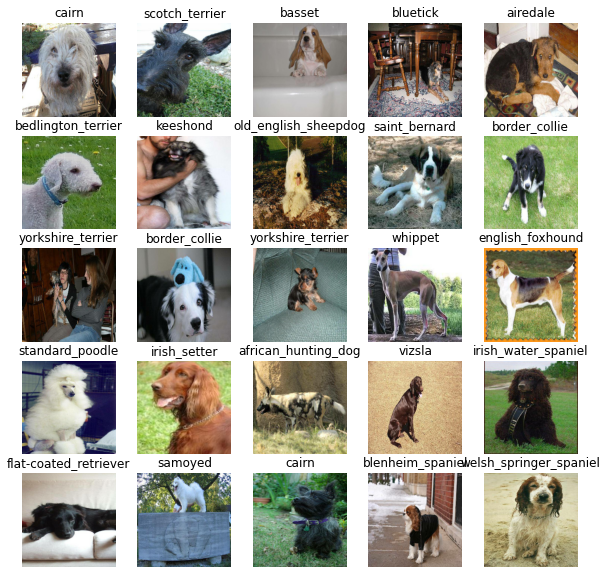

In [49]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [50]:
IMG_SIZE

224

In [51]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] 

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [52]:
INPUT_SHAPE

[None, 224, 224, 3]

Knowing this, create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion.
* Compiles the model.
* Builds the model .
* Returns the model.
https://www.tensorflow.org/guide/keras/overview

In [53]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [54]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for overfit.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [55]:
%load_ext tensorboard

In [56]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [57]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on small size data)

Our first model is only going to train on 1000 images.

In [58]:
NUM_EPOCHS = 100

In [60]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [61]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 318s 12s/step - loss: 4.5466 - accuracy: 0.1138 - val_loss: 3.3259 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 5s 189ms/step - loss: 1.6072 - accuracy: 0.6975 - val_loss: 2.0867 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 4s 177ms/step - loss: 0.5535 - accuracy: 0.9425 - val_loss: 1.6260 - val_accuracy: 0.6200
Epoch 4/100
25/25 [==============================] - 4s 177ms/step - loss: 0.2491 - accuracy: 0.9875 - val_loss: 1.4294 - val_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 5s 185ms/step - loss: 0.1438 - accuracy: 0.9975 - val_loss: 1.3652 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 4s 177ms/step - loss: 0.0987 - accuracy: 1.0000 - val_loss: 1.3344 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================

In [1]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

UsageError: Line magic function `%tensorboard` not found.


## Making and evaluating predictions using a trained model 

In [63]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [64]:
# Make predictions on the validation data 
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 156ms/step


array([[3.07000871e-03, 3.04228248e-04, 3.89995635e-03, ...,
        9.06639907e-04, 4.51160668e-05, 2.29238346e-02],
       [1.62272702e-03, 1.42503399e-04, 7.65472278e-03, ...,
        2.55550200e-04, 1.19195622e-03, 6.60699385e-04],
       [7.30337342e-05, 9.09188238e-05, 1.15634692e-04, ...,
        1.66718790e-04, 1.41921000e-05, 1.20511057e-03],
       ...,
       [6.81505799e-06, 2.03478103e-05, 6.97815412e-05, ...,
        2.26081938e-05, 1.81330397e-04, 1.54454916e-04],
       [3.40051320e-03, 5.01326984e-04, 1.49770043e-04, ...,
        2.98634201e-04, 1.03327875e-04, 3.09604742e-02],
       [5.77420578e-04, 2.18948247e-04, 1.47726864e-03, ...,
        3.00355838e-03, 2.61607650e-03, 8.31606158e-05]], dtype=float32)

In [66]:
# First prediction
index = 50
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[2.33981234e-04 5.39430112e-05 1.35497185e-05 7.35527501e-05
 3.89438192e-03 9.90796470e-05 3.40888189e-04 1.78981037e-03
 6.44483836e-03 2.28285827e-02 5.95192905e-05 1.29625914e-05
 2.51667137e-04 1.46152941e-03 9.66973777e-04 2.51507456e-03
 1.59972169e-05 7.58110720e-04 3.63398780e-04 5.95420948e-04
 3.14897443e-05 3.08967050e-04 1.68018421e-04 1.58212370e-05
 2.12162193e-02 3.42592684e-04 5.80798478e-05 4.95724147e-04
 4.89261911e-05 8.91785312e-05 9.13890690e-05 1.71311709e-04
 1.11727204e-04 5.20333524e-05 1.23162288e-04 3.34301803e-05
 3.35911405e-04 1.53064102e-04 1.63795339e-05 7.86506385e-02
 1.23511272e-04 4.54526853e-05 4.37542191e-03 1.06840716e-05
 4.42968390e-04 4.97843721e-05 8.19715860e-05 8.93686374e-05
 1.92287902e-04 4.17265808e-04 7.36227157e-05 3.29542963e-04
 1.91500076e-04 1.31129590e-03 4.74848785e-05 9.83419013e-04
 1.27278923e-04 1.41653916e-04 1.33552123e-04 4.74455846e-05
 1.69718085e-04 8.14564410e-04 1.35578557e-06 7.35810972e-05
 1.12104935e-04 3.944714

In [68]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[19])
pred_label

'dingo'

In [69]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [70]:
# Create a function to unbatch a batch dataset
def unbatch(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatch the validation data
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

## Visualization

In [71]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

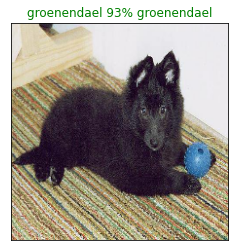

In [72]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [73]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

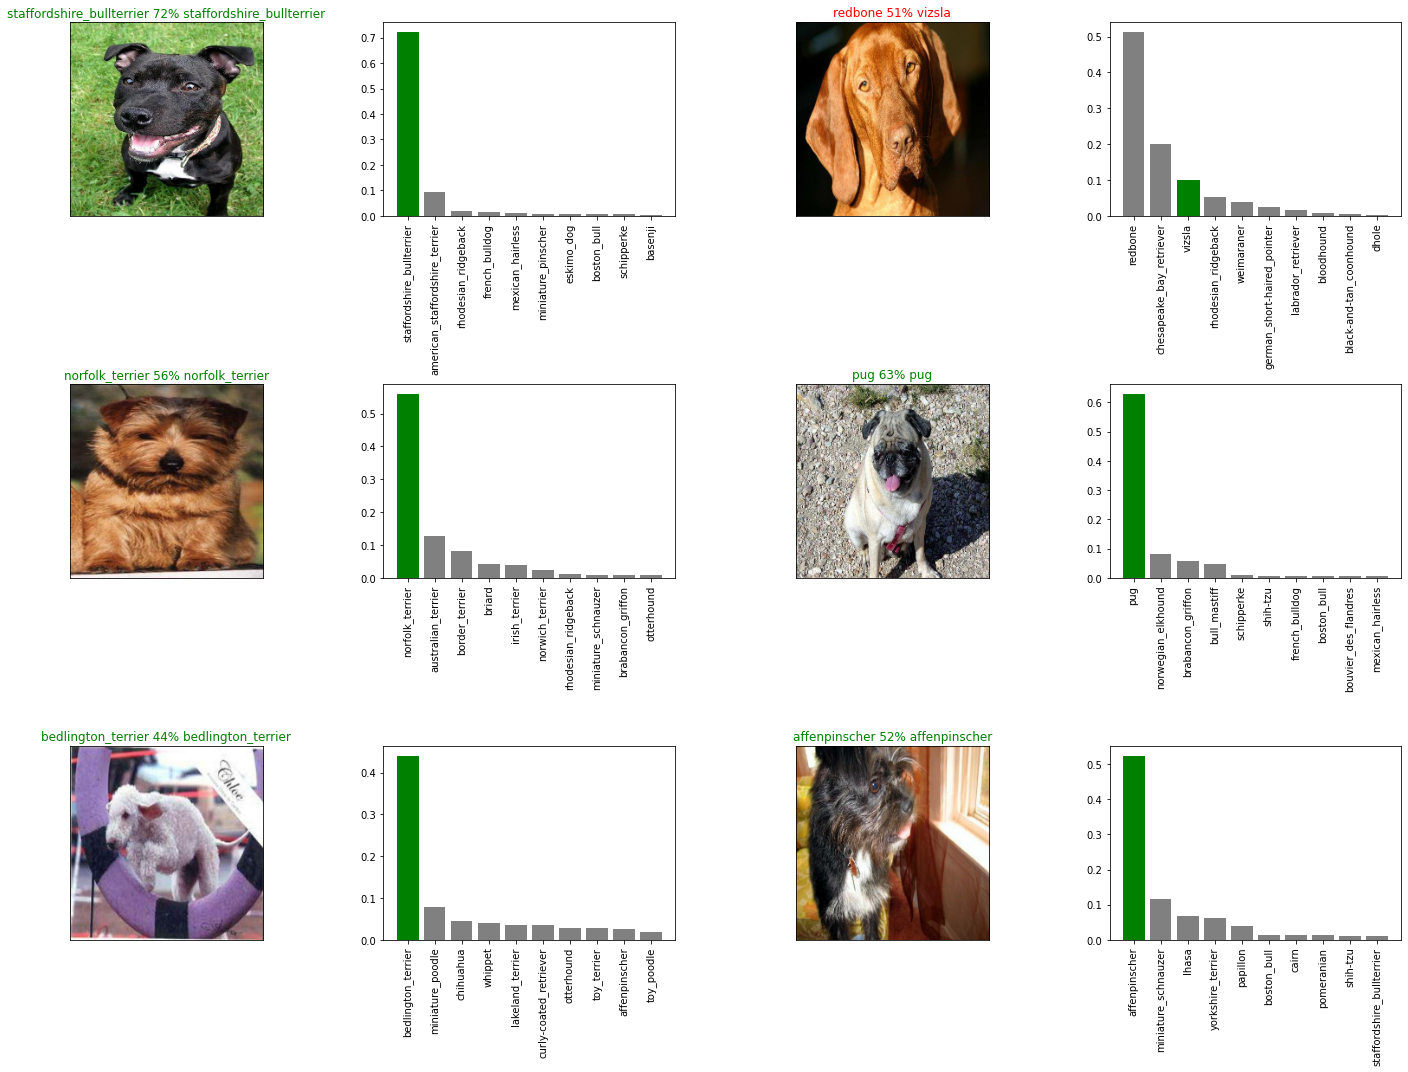

In [126]:
# check out few predictions and their proba values
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [76]:
# Create a function to save a model
def save_model(model, suffix=None):
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" 
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [77]:
# Create a function to load a trained model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [78]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20220123-10421642934566-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20220123-10421642934566-1000-images-mobilenetv2-Adam.h5'

In [79]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20211225-22581640473096-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20211225-22581640473096-1000-images-mobilenetv2-Adam.h5


In [80]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 121ms/step - loss: 1.2814 - accuracy: 0.6600


[1.2814483642578125, 0.6600000262260437]

## Training a big dog model 

In [82]:
len(X), len(y)

(10222, 10222)

In [83]:
# Create a data batch with the full data set
full_data = create_batches(X, y)

Creating training data batches...


In [84]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [85]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [86]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [87]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 2790s 9s/step - loss: 1.3692 - accuracy: 0.6642
Epoch 2/100
320/320 [==============================] - 49s 152ms/step - loss: 0.4091 - accuracy: 0.8797
Epoch 3/100
320/320 [==============================] - 49s 152ms/step - loss: 0.2380 - accuracy: 0.9350
Epoch 4/100
320/320 [==============================] - 50s 156ms/step - loss: 0.1543 - accuracy: 0.9637
Epoch 5/100
320/320 [==============================] - 50s 155ms/step - loss: 0.1068 - accuracy: 0.9784
Epoch 6/100
320/320 [==============================] - 52s 162ms/step - loss: 0.0776 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0579 - accuracy: 0.9923
Epoch 8/100
320/320 [==============================] - 52s 162ms/step - loss: 0.0457 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 53s 165ms/step - loss: 0.0379 - accuracy: 0.9959
Epoch 10/100
320/320 [==============================] - 53s 165ms

In [88]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20220123-11501642938659-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20220123-11501642938659-full-image-set-mobilenetv2-Adam.h5'

In [89]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20220123-11501642938659-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20220123-11501642938659-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

In [90]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/e2ef94a22af1d5375132de4eb19d2a64.jpg',
 'drive/My Drive/Dog Vision/test/e141811c20cade75f5cb3b7da86320a8.jpg',
 'drive/My Drive/Dog Vision/test/df69bb4b3dbdc81541e2bd70a5f35cb1.jpg',
 'drive/My Drive/Dog Vision/test/e29d2336a8559d96973c874c9c6c17c6.jpg',
 'drive/My Drive/Dog Vision/test/e000b7b3b37659a771d0151dc453bc0a.jpg',
 'drive/My Drive/Dog Vision/test/dd2c0c44f98af0cf223572a1aa189779.jpg',
 'drive/My Drive/Dog Vision/test/e715a411098c046cac90c3facfa58c77.jpg',
 'drive/My Drive/Dog Vision/test/e17512584de423da7fc17bfb2c7548ae.jpg',
 'drive/My Drive/Dog Vision/test/df2b5cee4b3d8a3cb893b668df16d572.jpg',
 'drive/My Drive/Dog Vision/test/e73d52671c56e1507fed58c4c287d5f1.jpg']

In [91]:
len(test_filenames)

10357

In [92]:
# Create test data batch
test_data = create_batches(test_filenames, test_data=True)

Creating test data batches...


In [93]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [99]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 47s 145ms/step


In [103]:
test_predictions[:10]

array([[5.36079270e-09, 9.59464841e-10, 2.09513920e-10, ...,
        1.07240901e-07, 2.36067740e-06, 3.65583510e-08],
       [9.72361658e-09, 9.61582100e-06, 1.46341915e-06, ...,
        1.39273567e-07, 1.59458704e-08, 9.90122384e-09],
       [3.87624405e-10, 1.12450999e-12, 1.08612885e-09, ...,
        3.04840042e-10, 1.38036541e-10, 3.38066068e-11],
       ...,
       [1.52301102e-10, 5.72572129e-11, 1.10609785e-10, ...,
        4.69769823e-09, 3.16548510e-10, 7.01241079e-11],
       [1.61664332e-07, 2.08909618e-08, 3.35404274e-11, ...,
        2.97953773e-10, 4.73630024e-09, 1.47035344e-08],
       [4.78944551e-10, 3.45544643e-12, 4.49178542e-12, ...,
        1.51850563e-11, 2.05378835e-12, 9.18571035e-12]])

In [104]:
test_predictions.shape

(10357, 120)

## Making predictions on custom images

In [5]:
# Get custom image filepaths
import os
custom_path = "drive/My Drive/Dog Vision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

FileNotFoundError: ignored

In [6]:
custom_image_paths

NameError: ignored

In [158]:
# Turn custom images into batch datasets 
custom_data = create_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [159]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [160]:
custom_preds.shape

(4, 120)

In [161]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['french_bulldog', 'maltese_dog', 'tibetan_mastiff', 'saluki']

In [162]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

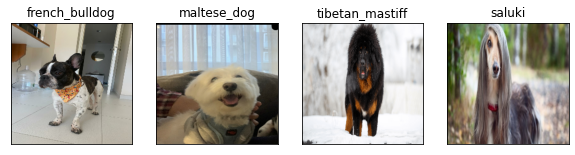

In [164]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)